In [1]:
import pandas as pd
import sklearn.linear_model
from sklearn.linear_model import LinearRegression, Lasso

from sklearn.metrics import mean_absolute_error

In [2]:
def MakeData(Name):
    tmp = pd.read_csv(("Log/"+str(Name)+".csv"), sep=";", header=1, na_filter=False)
    tmp = tmp.drop(columns=["Unnamed: 205","Date","C2res%","C3res%.1","C6res%.1","C7res%.1","C8res%","C9res%","C10res%"])
    tmp = tmp.drop(columns=["EXEC.1","IPC.1","FREQ.1","AFREQ.1","L3MISS.1","L2MISS.1","L3HIT.1","L2HIT.1","L2MPI.1","L3MPI.1","READ.1","WRITE.1"])
    tmp = tmp.iloc[:,1:28]
    for i in range(0,tmp.index.size-10):
        tmp.iloc[i,26] = 100 - tmp.iloc[i+10,26]  
    return tmp

In [3]:
povray = pd.read_csv("Log/povray.csv", sep=";", header=1, na_filter=False)
povray = povray.drop(columns=["Unnamed: 205","Date","C2res%","C3res%.1","C6res%.1","C7res%.1","C8res%","C9res%","C10res%"])
povray = povray.drop(columns=["EXEC.1","IPC.1","FREQ.1","AFREQ.1","L3MISS.1","L2MISS.1","L3HIT.1","L2HIT.1","L2MPI.1","L3MPI.1","READ.1","WRITE.1"])
povray = povray.iloc[:,1:28]
povray.iloc[:,0:27].columns

FileNotFoundError: File b'Log/povray.csv' does not exist

In [4]:
benchlist = ["astar","calculix","gamess","gcc","gobmk","mcf","povray","soplex","sphinx3","tonto","wrf"]
datalist = []
All = pd.DataFrame()
for bench in benchlist:
    datalist.append(MakeData(bench))
All = pd.concat(datalist, axis=0)

FileNotFoundError: File b'Log/astar.csv' does not exist

In [5]:
All.describe

<bound method NDFrame.describe of Empty DataFrame
Columns: []
Index: []>

In [6]:
for i in range(0,povray.index.size):
    povray.iloc[i,26] = 100 - povray.iloc[i,26]

NameError: name 'povray' is not defined

In [7]:
gcc.describe

NameError: name 'gcc' is not defined

In [8]:
lr = LinearRegression()
lr.fit(All.iloc[:,0:26], All.iloc[:,26])

IndexError: single positional indexer is out-of-bounds

In [9]:
lr.coef_

AttributeError: 'LinearRegression' object has no attribute 'coef_'

In [10]:
lr.score(All.iloc[:,0:26], All.iloc[:,26])

IndexError: single positional indexer is out-of-bounds

In [23]:
mean_absolute_error(lr.predict(All.iloc[:,0:26]), All.iloc[:,26])

1.4809651910551118

In [97]:
datalist[0]

,EXEC,IPC,FREQ,AFREQ,L3MISS,L2MISS,L3HIT,L2HIT,L3MPI,L2MPI,...,INSTnom,INSTnom%,C0res%,C1res%,C3res%,C6res%,C7res%,Proc_Energy_(Joules),Total_Util,TEMP
0,0.00285,0.698,0.00408,0.222,0.015100,0.0458,0.6400,0.426,1.820000e-03,0.005540,...,0.00570,0.1420,1.840,7.290000,0.00000,0.455,90.4,0.142,0.0330,49
1,0.00264,0.782,0.00338,0.222,0.009560,0.0339,0.6960,0.345,1.200000e-03,0.004250,...,0.00528,0.1320,1.520,1.580000,0.05520,0.263,96.6,0.142,0.0000,49
2,0.00211,1.030,0.00205,0.222,0.001210,0.0144,0.9000,0.388,2.000000e-04,0.002370,...,0.00423,0.1060,0.921,1.030000,0.00000,0.252,97.8,0.125,0.0125,50
3,0.00410,1.370,0.00298,0.222,0.002520,0.0173,0.8340,0.489,2.030000e-04,0.001390,...,0.00820,0.2050,1.340,1.410000,0.00000,0.000,97.3,0.132,0.0119,50
4,0.00209,0.937,0.00224,0.222,0.000285,0.0179,0.9820,0.368,4.500000e-05,0.002830,...,0.00419,0.1050,1.010,1.160000,0.04990,0.164,97.6,0.129,0.0119,50
5,0.00218,0.946,0.00230,0.222,0.000712,0.0180,0.9540,0.387,1.080000e-04,0.002740,...,0.00436,0.1090,1.040,1.230000,0.00000,0.374,97.4,0.130,0.0000,50
6,0.00202,0.996,0.00203,0.222,0.000234,0.0137,0.9790,0.397,3.850000e-05,0.002250,...,0.00404,0.1010,0.912,0.968000,0.00000,0.138,98.0,0.128,0.0119,50
7,0.00263,0.791,0.00333,0.222,0.008210,0.0329,0.7280,0.348,1.030000e-03,0.004140,...,0.00527,0.1320,1.500,1.600000,0.00000,0.745,96.2,0.135,0.0000,50
8,0.00207,0.965,0.00214,0.222,0.001260,0.0153,0.9040,0.392,2.010000e-04,0.002460,...,0.00414,0.1030,0.965,1.110000,0.05520,0.000,97.9,0.127,0.0119,50
9,0.26800,1.790,0.15000,1.070,0.093900,1.0700,0.9120,0.799,1.160000e-04,0.001320,...,0.53700,13.4000,14.000,15.300000,0.09060,1.830,68.8,1.900,0.1430,33


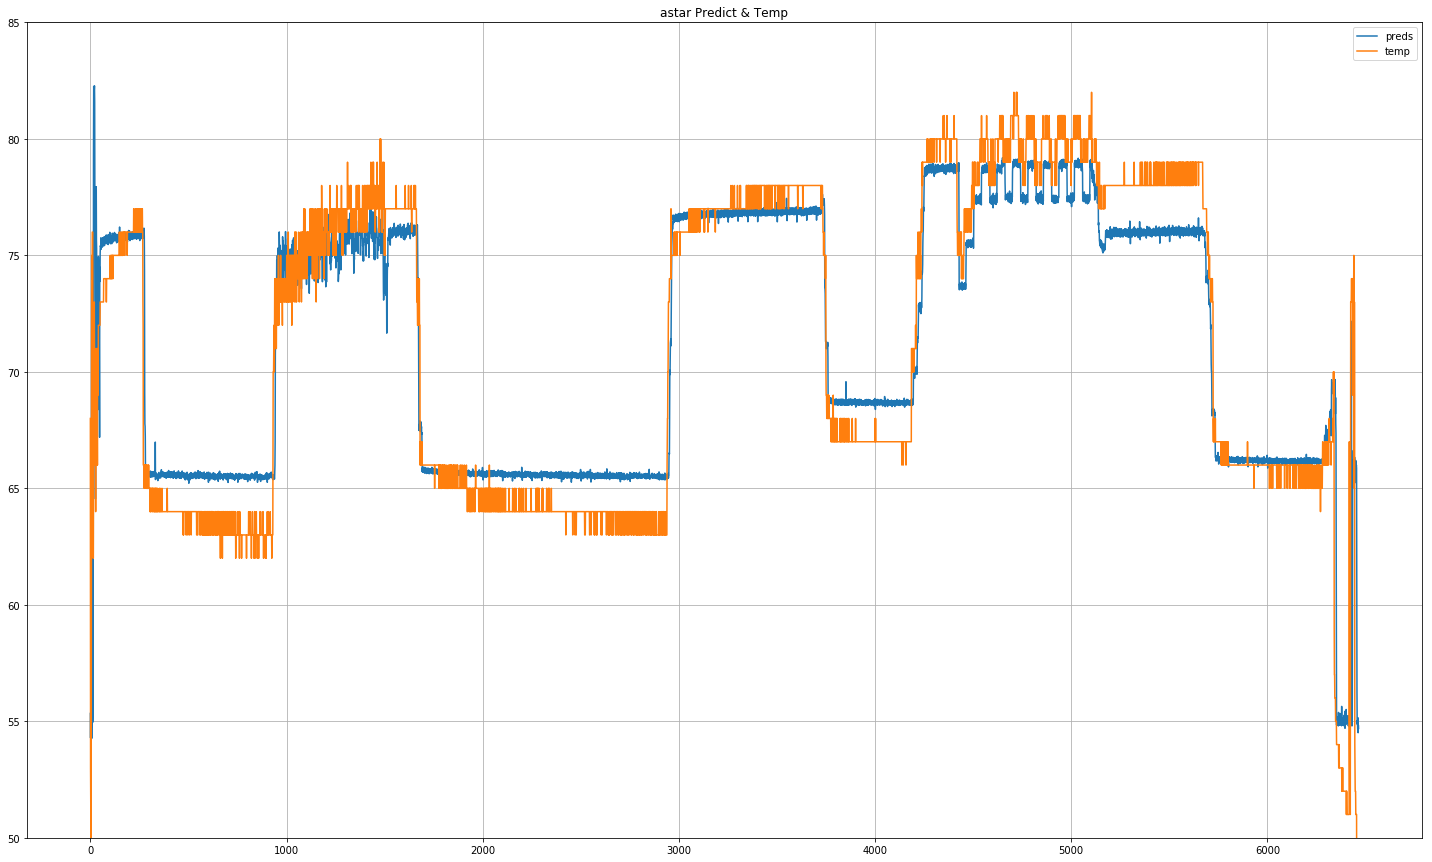

In [35]:
import matplotlib.pyplot as plt

predicted = lr.predict(datalist[0].iloc[:,0:26])
resultData = pd.DataFrame(predicted, columns = ['preds'])
resultData['temp'] = datalist[0].iloc[:,26]
resultData.plot(figsize=(25,15), grid = 1, title=(benchlist[0])+" Predict & Temp", ylim=[50,85])

<bound method NDFrame.head of           preds  temp
0     34.970071    48
1     48.498118    48
2     47.949674    48
3     48.477913    48
4     49.155009    47
5     44.606442    48
6     48.186653    48
7     49.023402    47
8     48.384326    48
9     54.690606    70
10    51.724088    67
11    49.545743    49
12    46.823209    49
13    49.703608    48
14    59.983734    61
15    55.075834    64
16    45.487064    66
17    60.024960    67
18    60.331561    58
19    60.211387    61
20    61.776130    62
21    60.532797    58
22    59.260853    64
23    59.498125    67
24    61.362445    64
25    63.788072    71
26    62.104862    72
27    63.310686    73
28    63.365555    65
29    61.395431    66
...         ...   ...
2137  79.987405    71
2138  73.631551    71
2139  75.825699    74
2140  69.708128    71
2141  70.925343    71
2142  75.704637    71
2143  73.314986    71
2144  75.028910    71
2145  74.883879    71
2146  69.169942    70
2147  73.009070    71
2148  73.850423    70
21